In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from prettytable import PrettyTable

#Load the respective databases
X = pd.read_csv('CAX_Preprocessed_features_ADA.csv')
y = pd.read_csv('CAX_Preprocessed_target_ADA.csv')

#### K-best Methodology

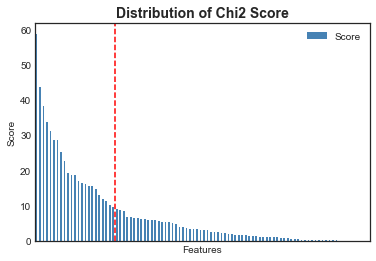

   Features      Score
71      TPA  58.761283
38      BDB  43.640928
43      B2V  38.337629
28      PLA  33.742089
64      LTR  31.214834
3       SIZ  28.609625
35      PAB  28.606501
22      CAV  25.164972
67      AWA  22.767548
53      ESB  19.159570
54      E10  18.721441
39      CCA  18.550196
73      INC  16.916463
65      PPP  16.360907
45      AYE  16.071762
72      SOL  15.524830
24      CDA  15.497472
61      PST  14.647444
34      MLB  13.081187
48      EDU  11.972995
56      REC  11.347407
19      BIG  10.228147


In [7]:
#Use the function, selecting features and chi2 as score function
select_kb = SelectKBest(chi2, k=96)
fit_1 = select_kb.fit(X,y)
#Store the result into a DataFrame for visualization
df_columns_kb = pd.DataFrame(X.columns)
df_scores_kb = pd.DataFrame(fit_1.scores_)
feature_scores_kb = pd.concat([df_columns_kb, df_scores_kb], axis=1)
feature_scores_kb.columns = ['Features','Score']
feature_scores_kb = feature_scores_kb.sort_values('Score', ascending=False)

#Plot the result to visualize them
feature_scores_kb.plot.bar(color='steelblue', label='Chi2 score')
plt.axvline(x=22.5, color='red', linestyle='--')
plt.title('Distribution of Chi2 Score', size=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks([])
plt.legend(loc='upper right', prop={'size':10})
plt.style.use('seaborn-white')
plt.savefig('Chi2 Score.png', dpi=800, bbox_inches='tight', pad_inches=0.5)
plt.show()

#And the best features are...
print(feature_scores_kb.nlargest(22,'Score'))

#### Correlation Methodology

     Correlation with STA
TPA              0.443313
ESB              0.426017
BDB              0.412883
PLA              0.359555
TMS              0.355048
B2V              0.351667
SUR              0.348721
CAV              0.322471
SOL              0.303089
SIZ              0.300418
PAB              0.298524
PAR              0.294913
LTR              0.292038
IAS              0.273832
DIS              0.269693
RES              0.267462
CPB              0.255555
EDU              0.252643
DWF              0.248232
AWA              0.239779
CDA              0.231170
AVC              0.230049
PST              0.227906
REC              0.220486
E10              0.219945
AYE              0.216116
CCA              0.215350
IND              0.212975
PPP              0.207497
BAR              0.202861
INC              0.200454


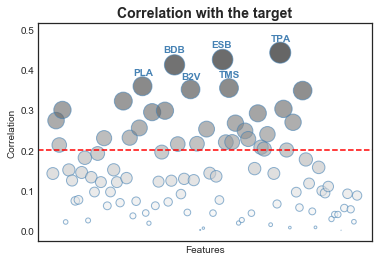

In [8]:
#Get the feature correlation with the target
corr = X.corrwith(y.STA)
#Store the results into a DataFrame for visualization
df_corr = pd.DataFrame(corr.abs())
df_corr.columns = ['Correlation with STA']
#And the most correlated features are...
a = df_corr[df_corr['Correlation with STA'] > 0.20]
print(a.sort_values(by=['Correlation with STA'], ascending=False))

#Plot the result to visualize them
colors=pd.DataFrame(corr.abs())
color = colors[0]
plt.scatter(np.arange(0,96,1), df_corr, s= df_corr*1000,
            c= color, alpha=0.6, edgecolors='steelblue')
plt.axhline(y=0.20, color='red', linestyle='--')
plt.title('Correlation with the target', size=14, fontweight='bold')
plt.text(68, 0.473, 'TPA', color='steelblue', size=10, fontweight='bold')
plt.text(49.5, 0.458, 'ESB', color='steelblue', size=10, fontweight='bold')
plt.text(34.5, 0.445, 'BDB', color='steelblue', size=10, fontweight='bold')
plt.text(25, 0.388, 'PLA', color='steelblue', size=10, fontweight='bold')
plt.text(51.7, 0.381, 'TMS', color='steelblue', size=10, fontweight='bold')
plt.text(40, 0.378, 'B2V', color='steelblue', size=10, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks([])
plt.style.use('seaborn-white')
plt.savefig('Correlation.png', dpi=800, bbox_inches='tight', pad_inches=0.5)
plt.show()

#### Check for Intercorrelation

In [9]:
#Combining last results, avoiding feature repetition
best_features = X[['TPA', 'ESB', 'BDB', 'PLA', 'TMS', 'B2V', 'SUR',
                   'CAV', 'SOL', 'SIZ', 'PAB', 'PAR', 'LTR', 'IAS',
                   'DIS', 'RES', 'CPB', 'EDU', 'DWF', 'AWA', 'CDA',
                   'AVC', 'PST', 'REC', 'E10', 'AYE', 'CCA', 'IND',
                   'PPP', 'BAR', 'INC', 'MLB', 'BIG']]

#Get the correlation among features
lin = best_features.corr()
#Convert all results into absolute value
lin_abs = lin.abs()
#Sum al columns
suma = lin_abs.sum(axis=1)-1
#Select only features with an absolute accumulated correlation less than the overall mean
selected_features = suma.loc[suma<(suma.mean()- 0.5 * suma.std())]
selected_features = selected_features.sort_values()
#And the less correlated features are...
print('The selected features are:', '\n',selected_features)

The selected features are: 
 AYE    2.290118
BIG    2.345219
BAR    2.400841
IND    2.534759
DWF    3.044004
PST    3.198428
CPB    3.229782
REC    3.296000
SUR    3.319168
CDA    3.375879
INC    3.415655
MLB    3.437828
dtype: float64


In [10]:
#Make a table for visualization purposes
feature_selection_summary = PrettyTable()
feature_selection_summary.field_names = ['K-best Selection', 'Correlation',
                                         'Features Selected', 'Theoretical Features']
feature_selection_summary.add_row(['TPA      BDB', 'TPA      ESB', 'AYE', 'REP'])
feature_selection_summary.add_row(['B2V      PLA', 'BDB      PLA', 'BIG', 'RED'])
feature_selection_summary.add_row(['LTR      SIZ', 'TMS      B2V', 'BAR', 'TOP'])
feature_selection_summary.add_row(['PAB      CAV', 'SUR      CAV', 'IND', 'TIE'])
feature_selection_summary.add_row(['AWA      ESB', 'SOL      SIZ', 'DWF', 'IND'])
feature_selection_summary.add_row(['E10      CCA', 'PAB      PAR', 'PST', 'NAD'])
feature_selection_summary.add_row(['INC      PPP', 'LTR      IAS', 'CPB', 'PAS'])
feature_selection_summary.add_row(['AYE      SOL', 'DIS      RES', 'REC', 'SAS'])
feature_selection_summary.add_row(['CDA      PST', 'CPB      EDU', 'SUR', 'AYE'])
feature_selection_summary.add_row(['MLB      EDU', 'DWF      AWA', 'CDA', 'EDU'])
feature_selection_summary.add_row(['REC      BIG', 'CDA      AVC', 'INC', 'SUR'])
feature_selection_summary.add_row(['            ', 'PST      REC', 'MLB', '   '])
feature_selection_summary.add_row(['            ', 'E10      AYE', '   ', '   '])
feature_selection_summary.add_row(['            ', 'CCA      IND', '   ', '   '])
feature_selection_summary.add_row(['            ', 'PPP      BAR', '   ', '   '])
feature_selection_summary.add_row(['            ', 'INC         ', '   ', '   '])
lines = feature_selection_summary.get_string()
with open('Feature Selection Summary', 'w') as w:
    w.write(str(lines))
print(feature_selection_summary)

#Create a CSV file with the best features according to the combined methodologies
features_selection = X[['AYE', 'BIG', 'BAR', 'IND', 'DWF', 'PST',
                        'CPB', 'REC', 'SUR', 'CDA', 'INC', 'MLB']]
with open('CAX_Features_Selection.csv', 'w'):
    pass
features_selection.to_csv('CAX_Features_Selection.csv', index=False, header=True)


+------------------+--------------+-------------------+----------------------+
| K-best Selection | Correlation  | Features Selected | Theoretical Features |
+------------------+--------------+-------------------+----------------------+
|   TPA      BDB   | TPA      ESB |        AYE        |         REP          |
|   B2V      PLA   | BDB      PLA |        BIG        |         RED          |
|   LTR      SIZ   | TMS      B2V |        BAR        |         TOP          |
|   PAB      CAV   | SUR      CAV |        IND        |         TIE          |
|   AWA      ESB   | SOL      SIZ |        DWF        |         IND          |
|   E10      CCA   | PAB      PAR |        PST        |         NAD          |
|   INC      PPP   | LTR      IAS |        CPB        |         PAS          |
|   AYE      SOL   | DIS      RES |        REC        |         SAS          |
|   CDA      PST   | CPB      EDU |        SUR        |         AYE          |
|   MLB      EDU   | DWF      AWA |        CDA      